In [1]:
import pandas as pd
import cv2 as cv
import numpy as np
from scipy import stats
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
import seaborn as sns

In [3]:
model = load_model("D:\Jain University Project\Mini project\DATAmodel10k.h5")
model1 = load_model("D:\Jain University Project\Mini project\Saved model\model10k.h5")
model2 = load_model("D:\Jain University Project\Mini project\DATA22model10k.h5")


In [4]:
y="D:/Jain University Project/Mini project/Data collection/sample for testing"

In [5]:
img=cv.imread(y + "/bacterial-spot.jpeg")
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
copy=img
img=cv.resize(img,(64,64))
X_t=np.array(img).reshape(-1,64,64,3)
X_t=X_t/255.0
preds = model.predict_classes(X_t)
print(preds)
preds1 = model1.predict_classes(X_t)
print(preds1)
preds2 = model2.predict_classes(X_t)
print(preds2)
CATEGORIES=["Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___healthy","Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot","Tomato___Spider_mites Two-spotted_spider_mite","Tomato___Target_spot","Tomato___Tomato_mosaic_virus","Tomato___Tomato_Yellow_Leaf_Curl_Virus"]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[1]
[3]
[1]


1
Tomato___Early_blight


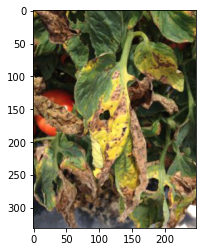

In [6]:
x=stats.mode([preds[0], preds1[0], preds2[0]]).mode[0]
print(x)
plt.imshow(copy)
print(CATEGORIES[x])

In [11]:
test_data=[]
DATASET="D:/Jain University Project/Mini project/Data collection/tomato/10k/test"
correct=0
wrong=0
pred=[]
for category in CATEGORIES:
        label=CATEGORIES.index(category)
        print(label)
        path=os.path.join(DATASET,category)
        for img_file in os.listdir(path):
            img=cv.imread(os.path.join(path,img_file),1)
            img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
            img=cv.resize(img,(64,64))
            test_data.append([img,label])
            X_t=np.array(img).reshape(-1,64,64,3)
            X_t=X_t/255.0
            preds = model.predict_classes(X_t)
            preds1 = model1.predict_classes(X_t)
            preds2 = model2.predict_classes(X_t)
            x=stats.mode([preds[0], preds1[0], preds2[0]]).mode[0]
            pred.append(x)
            if label==x:
                correct=correct+1
            else:
                wrong=wrong+1
            
print(correct)
print(wrong)
pred

0
1
2
3
4
5
6
7
8
9
1153
47


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 9,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [12]:
X_test=[]
y_test=[]

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import itertools
cm=confusion_matrix(y_test,pred)
print(cm)

[[118   0   0   0   0   0   1   1   0   0]
 [  2 113   0   3   0   1   0   0   0   1]
 [  0   0 120   0   0   0   0   0   0   0]
 [  2   8   1 107   2   0   0   0   0   0]
 [  0   0   0   1 114   2   2   1   0   0]
 [  0   2   0   1   3 114   0   0   0   0]
 [  0   3   0   0   0   0 116   1   0   0]
 [  0   1   0   0   0   1   1 117   0   0]
 [  0   1   0   0   1   0   0   0 118   0]
 [  3   1   0   0   0   0   0   0   0 116]]


In [15]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix for Voting Classifier ',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    fig, ax = plt.subplots(figsize=(10, 10))   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 

Normalized confusion matrix


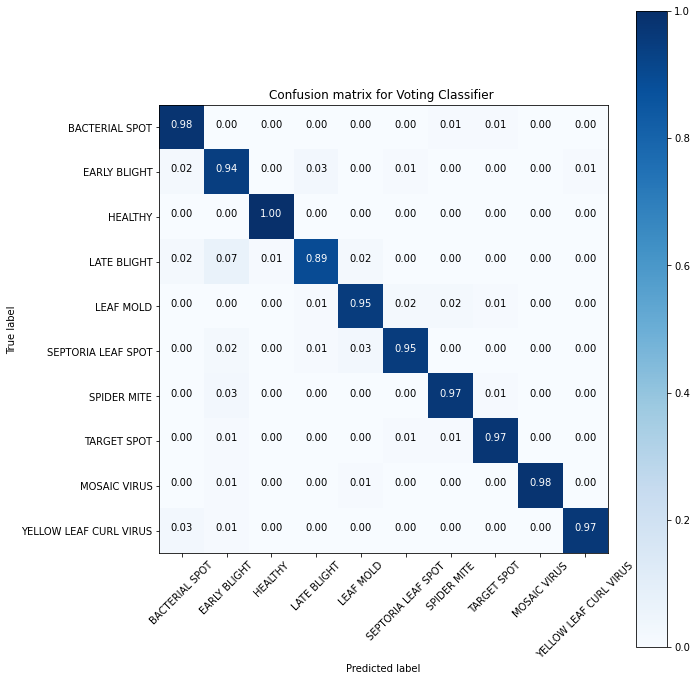

In [16]:
plot_confusion_matrix(cm,['BACTERIAL SPOT','EARLY BLIGHT','HEALTHY','LATE BLIGHT','LEAF MOLD','SEPTORIA LEAF SPOT','SPIDER MITE','TARGET SPOT','MOSAIC VIRUS','YELLOW LEAF CURL VIRUS'],normalize=True)

In [17]:
print("testing acc : ",(correct/1200)*100)

testing acc :  96.08333333333333


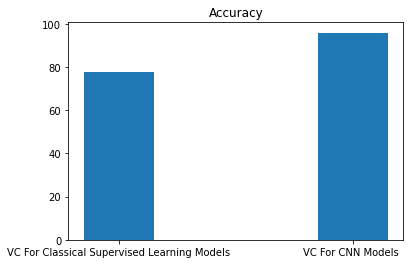

In [9]:
plt.bar(["VC For Classical Supervised Learning Models","VC For CNN Models "],[77.5,95.91],width=0.3)
plt.title("Accuracy")
plt.show()